# AirAsia Assessment

In [72]:
# configs
fp_data = 'data/AncillaryScoring_insurance.csv'
fp_encoder = 'encoder/encoder.pickle'

In [8]:
import pandas as pd
df = pd.read_csv(fp, engine='python')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PAXCOUNT             50000 non-null  int64  
 1   SALESCHANNEL         50000 non-null  object 
 2   TRIPTYPEDESC         50000 non-null  object 
 3   PURCHASELEAD         50000 non-null  int64  
 4   LENGTHOFSTAY         50000 non-null  int64  
 5   flight_hour          50000 non-null  int64  
 6   flight_day           50000 non-null  object 
 7   ROUTE                50000 non-null  object 
 8   geoNetwork_country   50000 non-null  object 
 9   BAGGAGE_CATEGORY     50000 non-null  int64  
 10  SEAT_CATEGORY        50000 non-null  int64  
 11  FNB_CATEGORY         50000 non-null  int64  
 12  INS_FLAG             50000 non-null  int64  
 13  flightDuration_hour  50000 non-null  float64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ MB


In [70]:
df.INS_FLAG.value_counts()

0    42522
1     7478
Name: INS_FLAG, dtype: int64

In [71]:
def load_airline_data(fp):
    df = pd.read_csv(fp, engine='python')

    # drop redundant row
    df = df[df.columns.drop('Id')]

    return df

def process_airline_data(df, fp, train_encoding=False, target=False):
    # retain only top 10 countries
    top_10 = df.geoNetwork_country.value_counts().head(10).index.to_list()
    is_top_10 = df.geoNetwork_country.isin(top_10)
    df.loc[~is_top_10, 'geoNetwork_country'] = 'Others'

    # remove columns
    cols_drop = [
        'ROUTE'         # high cardinality
        ]
    df = df[df.columns.drop(cols_drop)]

    # encode features
    # enumerate categorical columns
    cat_cols = ["SALESCHANNEL", "TRIPTYPEDESC", "flight_day", "geoNetwork_country"]

    df_cat = df[cat_cols]

    if train_encoding:     
        # Instantiating the Scikit-Learn OHE object
        ohe = OneHotEncoder(handle_unknown='ignore', drop='first', sparse=False)
        
        # Fitting the DataFrame to the Scikit-Learn one-hot encoder
        dummies = ohe.fit_transform(df_cat)

        # save trained encoder for future use
        with open(fp, 'wb') as f:
            pickle.dump(ohe, f)

    else:
        # load pickled encoder
        with open(fp, 'rb') as f:
            ohe = pickle.load(f)
            
        dummies = ohe.transform(df_cat)
        
    # Using the output dummies and transformer categories to produce a cleaner looking dataframe
    dummies_df = pd.DataFrame(dummies)
    dummies_df.columns = ohe.get_feature_names_out()

    numeric_df = df.drop(cat_cols, axis=1).reset_index(drop=True)

    df = pd.concat([dummies_df, numeric_df], axis=1)

    return df

In [63]:
test = load_airline_data(fp_dataes

Australia        17872
Malaysia          7174
South Korea       4559
Japan             3885
China             3387
Indonesia         2369
Taiwan            2077
Thailand          2030
India             1270
New Zealand       1074
Singapore         1044
United States      456
Vietnam            388
Macau              304
Hong Kong          295
Name: geoNetwork_country, dtype: int64

0        True
1        True
2        True
3        True
4        True
         ... 
49995    True
49996    True
49997    True
49998    True
49999    True
Name: geoNetwork_country, Length: 50000, dtype: bool

In [40]:
df = load_airline_data(fp)

In [41]:
df.head()

,PAXCOUNT,SALESCHANNEL,TRIPTYPEDESC,PURCHASELEAD,LENGTHOFSTAY,flight_hour,flight_day,ROUTE,geoNetwork_country,BAGGAGE_CATEGORY,SEAT_CATEGORY,FNB_CATEGORY,INS_FLAG,flightDuration_hour
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,0,5.52
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,0,5.52
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,0,5.52
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,0,5.52
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,0,5.52


In [57]:
df.ROUTE.value_counts(dropna=False).head(20)

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
ICNSYD     695
DMKPER     679
DPSICN     666
DMKOOL     655
MELPEN     649
MELTPE     644
SGNSYD     614
DMKSYD     532
COKSYD     511
COKMEL     474
CMBMEL     465
HNDPEN     442
PENPER     437
DPSPVG     417
CGKICN     414
Name: ROUTE, dtype: int64

In [45]:
df.groupby(['BAGGAGE_CATEGORY','SEAT_CATEGORY', 'FNB_CATEGORY'])\
    .agg({'PAXCOUNT': 'count',
          'PURCHASELEAD': 'mean',
          'flight_hour': 'mean',
          'PAXCOUNT': 'mean',
          'flightDuration_hour': 'mean',
          'LENGTHOFSTAY': 'mean',
          'INS_FLAG': 'mean'}).reset_index().sort_values('PAXCOUNT', ascending=False)

,BAGGAGE_CATEGORY,SEAT_CATEGORY,FNB_CATEGORY,PAXCOUNT,PURCHASELEAD,flight_hour,flightDuration_hour,LENGTHOFSTAY,INS_FLAG
6,1,1,0,1.775715,94.885942,8.971706,7.390946,21.329207,0.183319
5,1,0,1,1.698120,86.697996,9.082784,7.527287,30.337109,0.150629
7,1,1,1,1.675143,80.491220,9.195667,7.629143,29.948119,0.185975
4,1,0,0,1.641849,80.703466,8.884996,7.015957,25.132523,0.159329
0,0,0,0,1.451076,91.857102,9.127977,7.048469,14.715830,0.106743
1,0,0,1,1.378252,78.794797,9.101432,7.391494,15.990061,0.120725
3,0,1,1,1.338041,80.747573,9.380406,7.483831,12.311562,0.153575
2,0,1,0,1.327320,85.410438,9.282861,7.124188,11.713918,0.130155


-combinations with seat category are least pppular

In [46]:
df.groupby(['SALESCHANNEL', 'TRIPTYPEDESC'])\
    .agg({'PAXCOUNT': 'count',
          'PURCHASELEAD': 'mean',
          'flight_hour': 'mean',
          'PAXCOUNT': 'mean',
          'flightDuration_hour': 'mean',
          'LENGTHOFSTAY': 'mean',
          'INS_FLAG': 'mean'}).reset_index().sort_values('PAXCOUNT', ascending=False)

,SALESCHANNEL,TRIPTYPEDESC,PAXCOUNT,PURCHASELEAD,flight_hour,flightDuration_hour,LENGTHOFSTAY,INS_FLAG
2,Internet,RoundTrip,1.592287,85.270700,9.020432,7.290837,23.809594,0.155942
5,Mobile,RoundTrip,1.585239,81.678342,9.411365,7.115645,17.343996,0.108470
1,Internet,OneWay,1.579946,94.704607,9.317073,8.003225,18.750678,0.048780
0,Internet,CircleTrip,1.571429,94.205357,9.160714,7.834911,25.660714,0.044643
3,Mobile,CircleTrip,1.500000,125.750000,9.500000,5.802500,13.000000,0.000000
4,Mobile,OneWay,1.277778,26.833333,7.944444,7.219444,3.388889,0.111111


-significantly less insurance for non-roundtrip flights  
-majority of trips are roundtrips  
-Internet is still the dominant booking method

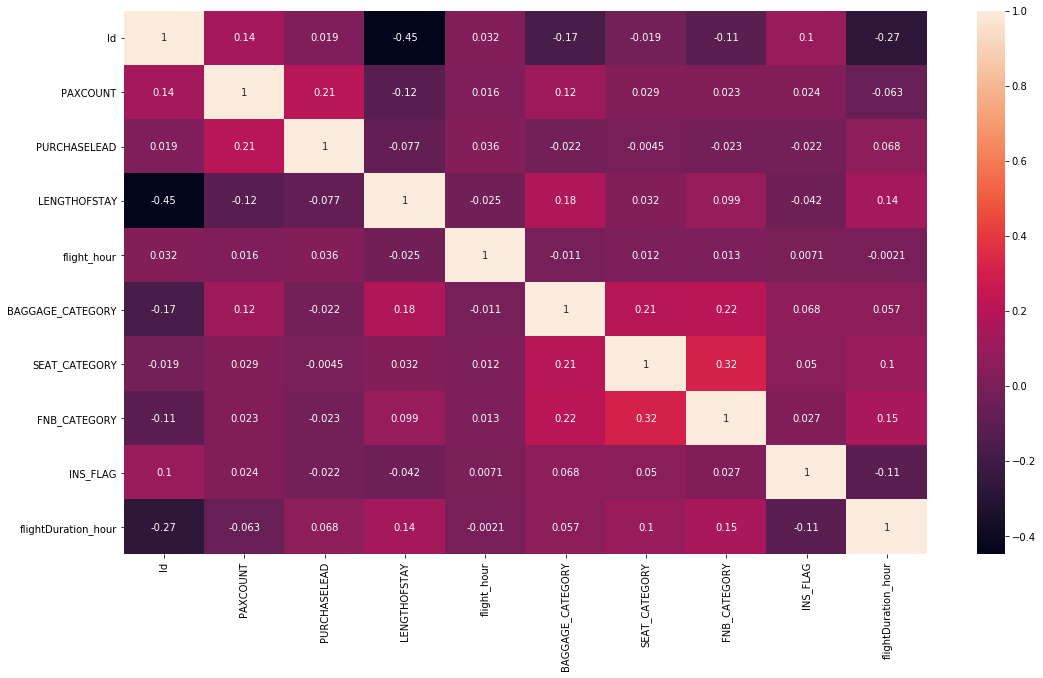

In [11]:
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline
plt.rcParams["figure.figsize"] = [18, 10]

corrMatrix = df.corr()
plt.figure(figsize=(18,10))
sn.heatmap(corrMatrix, annot=True)

plt.show()

## Analytical Story

## Model Development

## Deployment Design

## Testing